In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors

sns.set_theme(context="talk", style="ticks", palette="colorblind", color_codes=True)

from matplotlib import cm
from astropy.io import fits
from astropy.table import Table

from MaStarChecks.plotting.analysis import density_scatter_kde, contours_from_pdf
from MaStarChecks.plotting.styles import *

In [2]:
f = fits.open("_data/mastar-catalogue.fits.gz")

In [3]:
#mode_predict, p16_predict, p50_predict, p84_predict

# T_cosha = pd.read_csv('T_cosha.csv')
# T_cosha

import joblib

cosha = joblib.load("../busy-week/_cache/estimator-mor-v3.1.1-cleaned-v2-gsl.pk")
cosha

{'mode': MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=4,
                                                          min_samples_split=5,
                                                          random_state=0,
                                                          verbose=1),
                      n_jobs=-1),
 'P16': MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.16,
                                                          loss='quantile',
                                                          max_depth=4,
                                                          min_samples_split=5,
                                                          random_state=0,
                                                          verbose=1),
                      n_jobs=-1),
 'P50': MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.5,
                                                          loss='quantile',
                                 

In [13]:
testing_subset = ['7-18237701',
 '7-11663876',
 '7-1138165',
 '3-46861114',
 '7-11017374',
 '7-17078823',
 '3-155311156',
 '3-160719559',
 '3-24068365',
 '7-10933240',
 '60-656339589163923328',
 '3-113121512',
 '7-7373180',
 '7-7163483',
 '60-2051287173829740032',
 '7-4403753',
 '7-17084272',
 '3-50027937',
 '60-148758253881792000',
 '3-126064645',
 '3-130324009',
 '7-28627673',
 '3-160951394',
 '7-5252275',
 '7-755124',
 '60-608018423943475328',
 '7-17122828',
 '3-112694611',
 '3-109785467',
 '7-17687325',
 '7-16530655',
 '3-151800806',
 '7-18211543',
 '7-7523191',
 '7-20729478',
 '3-17939936',
 '7-18198783',
 '3-138749100',
 '3-48498730',
 '7-17642965',
 '3-138748940',
 '3-139451637',
 '3-109499894',
 '7-4270848',
 '54-44681341',
 '7-18032661',
 '60-989901867655761664',
 '3-59691487',
 '7-24699413',
 '7-9156908',
 '54-46001406',
 '7-17128323',
 '7-3950237',
 '3-109499928',
 '3-157092400',
 '7-17795357',
 '3-54368154',
 '7-9443634',
 '3-135908167',
 '7-6539819',
 '3-146788771',
 '4-2840',
 '7-7068971',
 '3-108585878',
 '7-4879826',
 '54-38642114',
 '7-11049968',
 '7-10350676',
 '3-113585009',
 '60-1821608815552976512',
 '60-3415275564767106688',
 '7-21793503',
 '3-160796268',
 '7-23245723',
 '7-7852133',
 '3-146924074',
 '60-602086932373648512',
 '7-22533157',
 '7-7431963',
 '3-98238488',
 '7-27060475',
 '7-17619500',
 '3-112222195',
 '3-109275646',
 '60-604905156769963136',
 '3-134734870',
 '60-1139494616502486528',
 '3-31933120',
 '7-17865241',
 '7-18584558',
 '7-17090642',
 '7-7752759',
 '3-13398927',
 '3-10503039',
 '7-18020425',
 '7-17500645',
 '60-996264947603772800',
 '3-138981743',
 '7-23007103',
 '3-150182827',
 '3-25616444',
 '3-136745783',
 '3-12253910',
 '7-2309197',
 '3-153201522',
 '3-112904239',
 '7-4212621',
 '3-109736219',
 '7-10619481',
 '3-26111329',
 '3-40426539',
 '7-11778054',
 '7-11702830',
 '7-8302390',
 '7-13731940',
 '7-17856093',
 '3-137018406',
 '3-114066177',
 '7-620567',
 '3-145891191',
 '3-123193148',
 '3-47968833',
 '7-18266775',
 '3-49019308',
 '3-124285105',
 '3-30883759',
 '3-18594669',
 '60-1360408522818465536',
 '3-41019223',
 '3-53361825',
 '3-147213184',
 '7-11356573',
 '7-13627605',
 '3-149060541',
 '3-36344672',
 '3-132054468',
 '7-27013346',
 '7-17814633',
 '3-13503022',
 '3-139680626',
 '3-48499962',
 '3-112500468',
 '7-18037147',
 '60-676895989836309632',
 '7-18274951',
 '3-46838610',
 '3-47421073',
 '3-12457181',
 '3-852100',
 '3-147604804',
 '7-9741255',
 '3-152155609',
 '3-13609085',
 '7-25725707',
 '3-150067225',
 '60-598595708076959872',
 '7-11675869',
 '7-13810967',
 '60-3131822223044709632',
 '7-18088665',
 '7-17371036',
 '7-18188540',
 '3-159348999',
 '3-145895044',
 '7-8637388',
 '3-109685993',
 '7-18137093',
 '7-8012981',
 '3-142437299',
 '7-27010941',
 '3-139451502',
 '7-23493274',
 '3-145465653',
 '60-1995068250954304640',
 '3-131370212',
 '7-11698306',
 '60-3409047041850973824',
 '3-138505177',
 '7-18014425',
 '3-152861231',
 '3-109785319',
 '7-737172',
 '3-129685936',
 '7-27184007',
 '3-109069581',
 '3-103517906',
 '7-11328892',
 '7-4237660',
 '3-112312194',
 '3-159037305',
 '7-10285814',
 '3-130324035',
 '3-149050613',
 '7-7386959',
 '7-18203101',
 '3-139680531',
 '3-120274675',
 '3-10769895',
 '7-4186583',
 '3-47968472',
 '7-9286263',
 '3-138991893',
 '3-48499053',
 '7-26817123',
 '3-141054836',
 '7-782849',
 '7-7041494',
 '7-724744',
 '7-5061347',
 '7-20864416',
 '54-38639891',
 '7-17606072',
 '3-152161912',
 '3-14106207',
 '7-15454009',
 '3-90350764',
 '60-601987048613633792',
 '3-112800323',
 '3-153088866',
 '7-26835732',
 '7-9161304',
 '7-17493779',
 '7-3634126',
 '7-11021417',
 '7-18225745',
 '3-104619290',
 '60-2051290678523754752',
 '3-132716627',
 '4-15008',
 '7-17152035',
 '7-11684796',
 '7-17086810',
 '60-995985362412268544',
 '3-149050932',
 '3-127404563',
 '7-841534',
 '4-19552',
 '7-6750715',
 '7-17091875',
 '3-139680671',
 '7-572615',
 '3-144675270',
 '7-7928405',
 '60-931955749445090432',
 '3-103786965',
 '7-17775332',
 '3-125544166',
 '3-125606917',
 '3-36604440',
 '3-109232372',
 '3-29283595',
 '7-11289791',
 '7-2456952',
 '3-27664452',
 '60-604704770775147520',
 '3-149294157',
 '7-26823620',
 '3-137524300',
 '3-137770046',
 '3-141678474',
 '7-17737376',
 '3-151679504',
 '3-39283873',
 '3-53358633',
 '7-2748343',
 '3-104554432',
 '3-141054807',
 '60-601971655450951168',
 '7-9455207',
 '7-1095014',
 '3-94198939',
 '7-7828620',
 '7-17474292',
 '3-12732917',
 '7-17644330',
 '3-156918192',
 '60-676905507483824256',
 '7-10102857',
 '3-160718876',
 '54-46661637',
 '3-141054720',
 '7-7379058',
 '7-14329689',
 '7-17590580',
 '60-655995235866278400',
 '7-27916355',
 '3-141678613',
 '3-12535566',
 '7-10379595',
 '3-28763217',
 '7-4904287',
 '3-113126600',
 '60-598551594468768896',
 '7-9498814',
 '3-113701796',
 '7-8292710',
 '7-14665460',
 '3-142685112',
 '3-52853453',
 '3-135343084',
 '7-17728693',
 '60-52916818882429568']

mastar_catalogue = Table(f[1].data).to_pandas()

testing_idx = mastar_catalogue.loc[mastar_catalogue.ID.isin(testing_subset)].index.values
testing_idx.size

302

In [10]:
mode_predict = cosha["mode"].predict(f[0].data)
p16_predict  = cosha["P16"].predict(f[0].data)
p50_predict  = cosha["P50"].predict(f[0].data)
p84_predict  = cosha["P84"].predict(f[0].data)

In [11]:
# calcular std = (p84-p16)/2

mode_Teff  = mode_predict[:,0]
p16_Teff   = p16_predict[:,0]
p84_Teff   = p84_predict[:,0]
mode_G     = mode_predict[:,1]
p16_G      = p16_predict[:,1]
p84_G      = p84_predict[:,1]
mode_Fe    = mode_predict[:,2]
p16_Fe     = p16_predict[:,2]
p84_Fe     = p84_predict[:,2]
mode_alpha = mode_predict[:,3]
p16_alpha  = p16_predict[:,3]
p84_alpha  = p84_predict[:,3]

std_Teff  = np.abs(p84_Teff - p16_Teff)/2     # STD T_eff en LOG
std_G     = np.abs(p84_G - p16_G)/2 
std_Fe    = np.abs(p84_Fe - p16_Fe)/2 
std_alpha = np.abs(p84_alpha - p16_alpha)/2

# STD T_eff LINEAL
std_Teff  = std_Teff * 10**(mode_Teff) * np.log(10)      #std[:,0] = std[:,0] * 10**(mode_predict[:,0]) * np.log(10)


In [17]:
np.median(std_alpha[testing_idx])

0.09521993170464566

In [6]:
# Teff, primer columna [0], logG segunda columna [1]

T_eff = mode_Teff   #len = 21847
log_G = mode_G      #len = 21847

Fe    = mode_Fe     #len = 21847
alpha = mode_alpha  #len = 21847

C = std_Teff        #LINEAL

nbins = 40

units = [r"K", r"", r"", r""]
cols = [r"$T_\mathrm{eff}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$", r"$[\alpha/\mathrm{Fe}]$"]

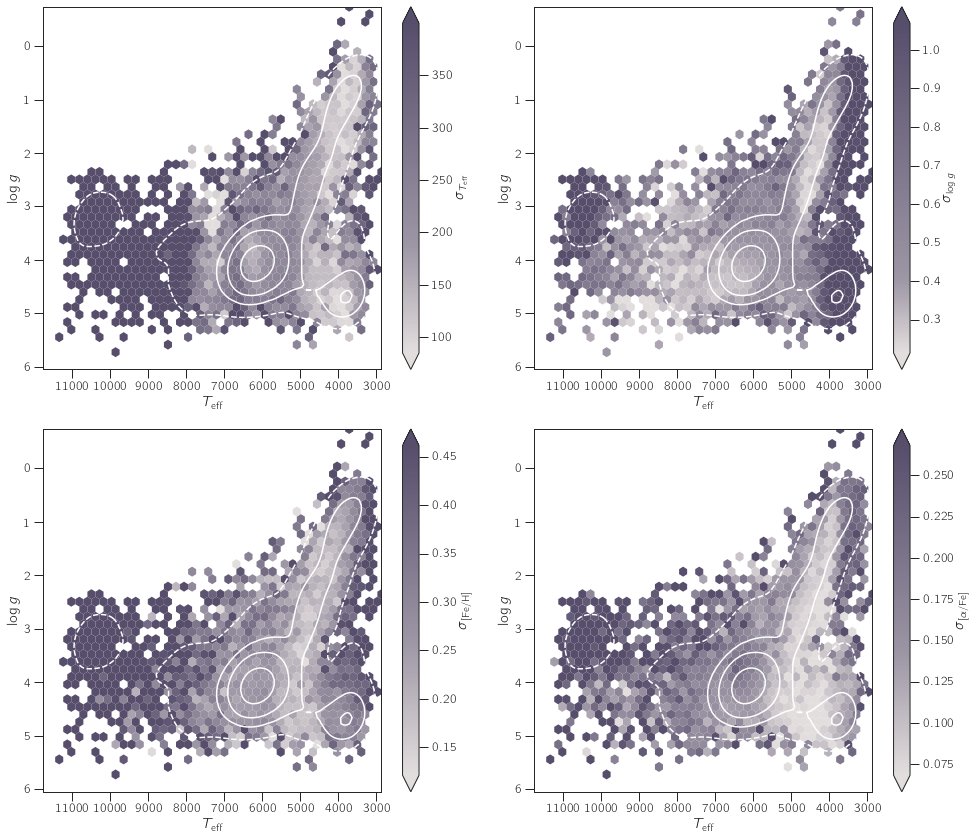

In [7]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

x = 10**T_eff
y = log_G

delta_x, delta_y = std_Teff.mean()/5, std_G.mean()/5
rangex, rangey = (min(x), max(x)), (min(y), max(y))

# COMPUTE DENSITY (PDF) FUNCTION -------------------------------------------------------

pdf_z = density_scatter_kde(x, y, bw_method=0.2)
z = pdf_z(x, y)

levels, X, Y, Z = contours_from_pdf(
    pdf_func=pdf_z,
    range_x=rangex,
    range_y=rangey,
    deltas=(delta_x,delta_y), percentiles=(25,50,75,95),
    return_grid=True
)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig, axs = plt.subplots(2, 2, figsize=(14,12))
axs = axs.flatten()

stds = [std_Teff, std_G, std_Fe, std_alpha]
for i, ax in enumerate(axs):
    z = stds[i]
    norm = matplotlib.colors.TwoSlopeNorm(vcenter=np.percentile(z,50), vmin=np.percentile(z,10), vmax=np.percentile(z,90))
    t = ax.hexbin(x, y, C=z, gridsize=nbins, reduce_C_function=np.median, norm=norm,
                  cmap=sns.color_palette(f"blend:{LIGHT_COLOR},{MASTAR_COLOR}", as_cmap=True), edgecolors="none")
    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[1])
    cb = plt.colorbar(t, ax=ax, extend="both")
    cb.set_label(r'$\sigma_{%s}$'%(cols[i].strip("$")))
    contour = ax.contour(X, Y, Z, levels=levels, origin="lower", colors="w", linewidths=1.5, linestyles=["--"]+3*["-"])
    ax.set_xlim(ax.get_xlim()[::-1])
    ax.set_ylim(ax.get_ylim()[::-1])
#     ax.set_fc("0.9")
fig.tight_layout()
fig.savefig("_img/logg-teff-precisions.png", bbox_inches="tight")

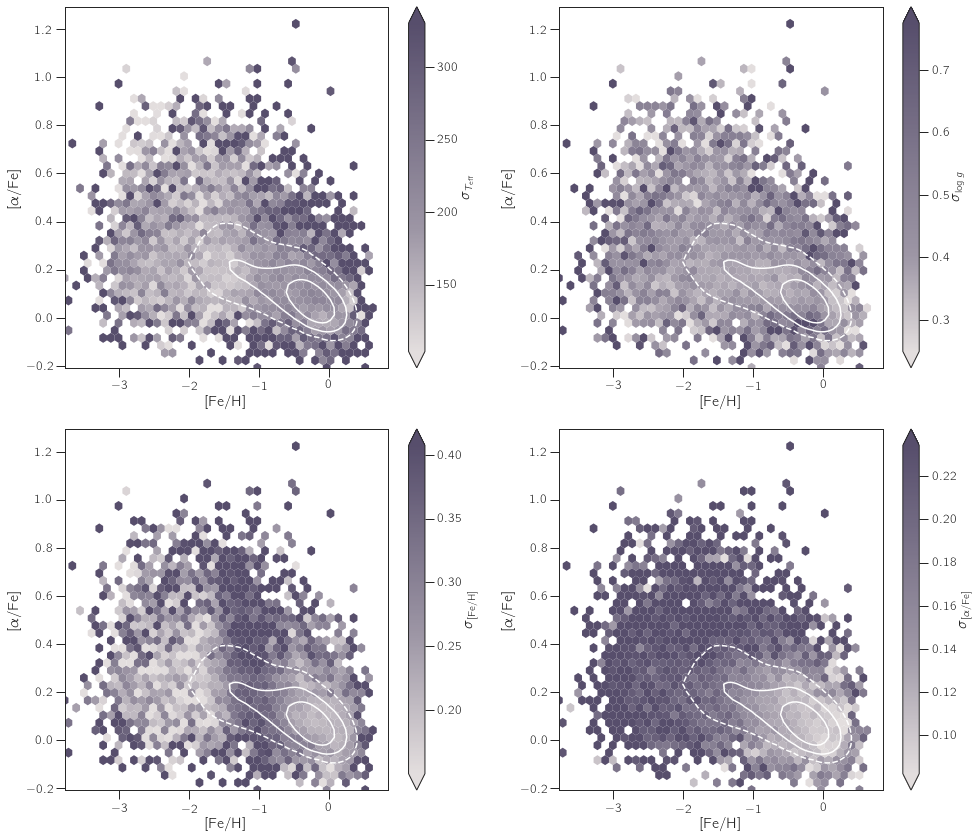

In [8]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

x = Fe
y = alpha

delta_x, delta_y = std_Fe.mean()/5, std_alpha.mean()/5
rangex, rangey = (min(x), max(x)), (min(y), max(y))

# COMPUTE DENSITY (PDF) FUNCTION -------------------------------------------------------

pdf_z = density_scatter_kde(x, y, bw_method=0.2)
z = pdf_z(x, y)

levels, X, Y, Z = contours_from_pdf(
    pdf_func=pdf_z,
    range_x=rangex,
    range_y=rangey,
    deltas=(delta_x,delta_y), percentiles=(25,50,75),
    return_grid=True
)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig, axs = plt.subplots(2, 2, figsize=(14,12))
axs = axs.flatten()

stds = [std_Teff, std_G, std_Fe, std_alpha]
for i, ax in enumerate(axs):
    z = stds[i]
    norm = matplotlib.colors.TwoSlopeNorm(vcenter=np.percentile(z,50), vmin=np.percentile(z,16), vmax=np.percentile(z,84))
    t = ax.hexbin(x, y, C=z, gridsize=nbins, reduce_C_function=np.median, norm=norm,
                  cmap=sns.color_palette(f"blend:{LIGHT_COLOR},{MASTAR_COLOR}", as_cmap=True), edgecolors="none")
    ax.set_xlabel(cols[2])
    ax.set_ylabel(cols[3])
    cb = plt.colorbar(t, ax=ax, extend="both")
    cb.set_label(r'$\sigma_{%s}$'%(cols[i].strip("$")))
    contour = ax.contour(X, Y, Z, levels=levels, origin="lower", colors="w", linewidths=1.5, linestyles=["--"]+3*["-"])
#     ax.set_fc("0.7")
fig.tight_layout()
# fig.savefig("_img/alpham-met-precisions.png", bbox_inches="tight")

In [9]:
from MaStarChecks.constants import MASTAR_GAIA_PATH

# catalogue = Table(f[1].data).to_pandas()

# match_fits = fits.open("../analysis/_data/mastarall-gaia-v3_1_1-v1_7_7.fits")
match_fits = fits.open(MASTAR_GAIA_PATH)

match_columns = ["MANGAID", "SOURCE_ID", "RA", "DEC", "R_EST", "PHOT_G_MEAN_MAG", "BP_RP"]
match_mastar_gaia = Table(match_fits[1].data)[match_columns].to_pandas()
match_mastar_gaia = match_mastar_gaia.rename(columns=lambda s:s.lower())
match_mastar_gaia = match_mastar_gaia.rename(columns={"mangaid":"ID"})

match_mastar_gaia.ID = match_mastar_gaia.ID.str.strip()
match_mastar_gaia = match_mastar_gaia.loc[match_mastar_gaia.ID.isin(f[1].data["ID"])].reset_index(drop=True)
# match_mastar_gaia = match_mastar_gaia.mask((match_mastar_gaia==-999).any(axis="columns"))
match_mastar_gaia["g"] = match_mastar_gaia.phot_g_mean_mag - 5*np.log10(match_mastar_gaia.r_est) + 5

<AxesSubplot:xlabel='bins', ylabel='counts'>

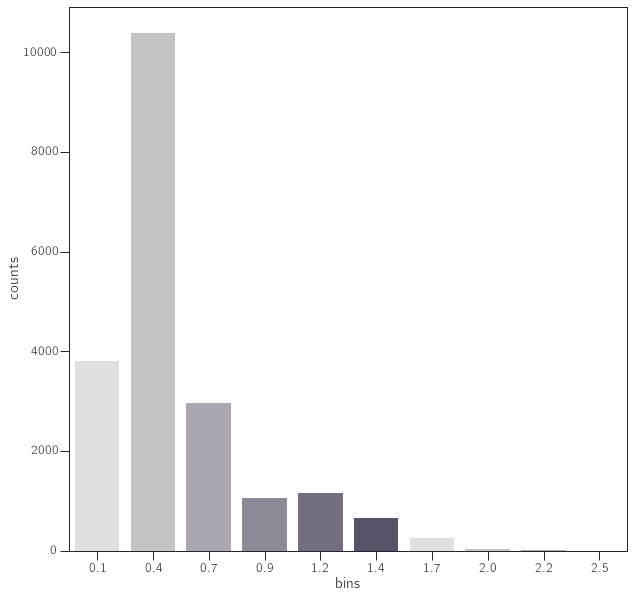

In [10]:
counts, bins = np.histogram(std_G, bins=10)

sns.barplot(x="bins", y="counts", data=pd.DataFrame(columns=["bins", "counts"], data=np.column_stack([np.round(0.5*(bins[1:]+bins[:-1]),1), counts])), palette=sns.color_palette(f"blend:{LIGHT_COLOR},{MASTAR_COLOR}"))

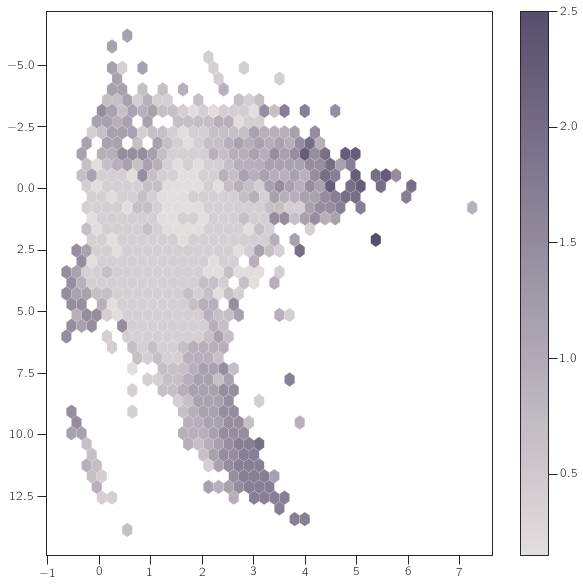

In [11]:
from scipy.stats import mode

fig, ax = plt.subplots()

z = std_G
hx = ax.hexbin(match_mastar_gaia.bp_rp, match_mastar_gaia.g, C=pd.cut(z, 10, precision=1).map(lambda v:v.mid), reduce_C_function=lambda v:mode(v)[0][0], gridsize=40, edgecolors="w", cmap=sns.color_palette(f"blend:{LIGHT_COLOR},{MASTAR_COLOR}", as_cmap=True), linewidths=0.1)
plt.colorbar(hx)

ax.set_ylim(ax.get_ylim()[::-1]);

In [12]:
# from scipy.stats import binned_statistic_2d

# st, xe, ye, counts = binned_statistic_2d(match_mastar_gaia.bp_rp, match_mastar_gaia.g, pd.cut(z, 10, precision=1).map(lambda v:v.mid), statistic=lambda v: mode(v)[0][0], bins=40)

# fig, ax = plt.subplots()
# pm = ax.pcolormesh(xe, ye, st.T, edgecolors="w", cmap=sns.color_palette(f"blend:{LIGHT_COLOR},{MASTAR_COLOR}", as_cmap=True), linewidths=0.01)
# plt.colorbar(pm)

# ax.set_ylim(ax.get_ylim()[::-1])

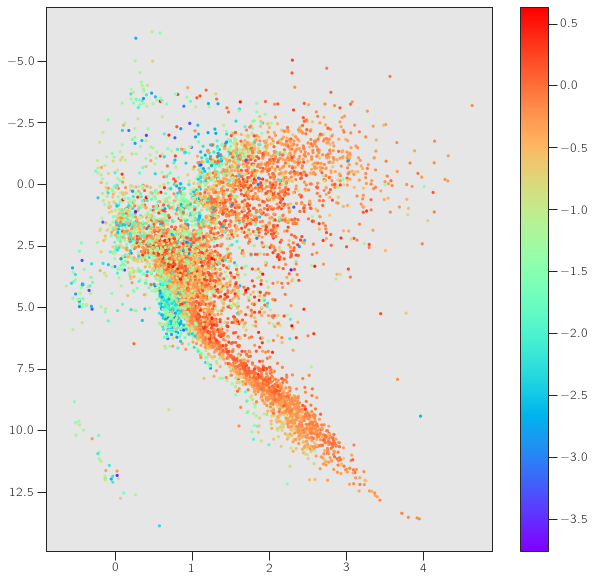

In [24]:

std_z = pd.cut(z, 10, precision=1).map(lambda v:v.mid)
idx = np.argsort(mode_Teff)

fig, ax = plt.subplots()
sc = ax.scatter(match_mastar_gaia.bp_rp.values[idx][mask], match_mastar_gaia.g.values[idx][mask], c=mode_Fe[idx][mask], s=10, lw=0, cmap="rainbow")
plt.colorbar(sc)

ax.set_facecolor("0.9")
ax.set_ylim(ax.get_ylim()[::-1]);

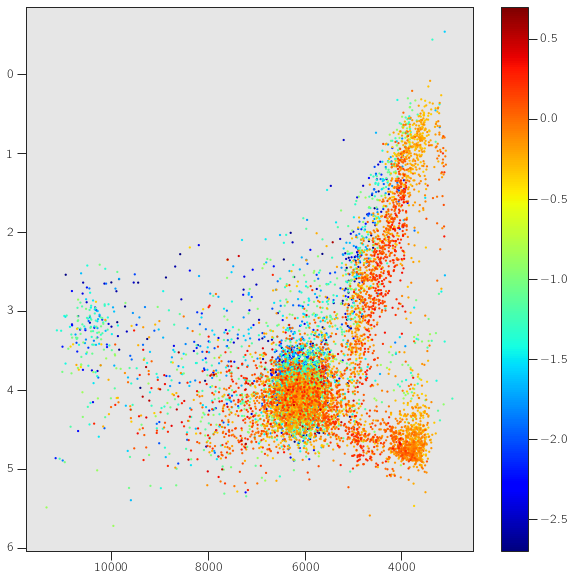

In [23]:
fig, ax = plt.subplots()

idx = np.argsort(mode_Fe)

mask = f["CATALOGUE"].data["SCI"].astype(bool)
sc = ax.scatter(10**mode_Teff[idx][mask], mode_G[idx][mask], c=mode_Fe[idx][mask], s=5, lw=0, cmap="jet", vmin=-2.7, vmax=0.7)
plt.colorbar(sc)
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_fc("0.9")